# Lab Assignment 2

In the third assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning () repository on Github.

### Deadline October 26th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [161]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Scikit-learn has the dataset built in. The dataset contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


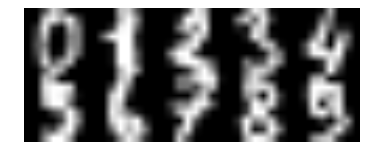

In [162]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:]) #':' fills in all the values for those dim.
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. Also pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner.

Plot how your score on the test set improves over time. My best score was about 85% correct!

Make sure to comment your code.

In [163]:
#Make a prediction function h
def prediction_function(x,theta):
    #transpose theta
    theta_t = np.transpose(theta)
    #calculate prediction function by calculating the sigmoid function
    sigmoid = np.divide(1,(np.add(1,np.exp(-(theta_t.dot(x))))))
    return sigmoid

In [164]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    #define m as the size (number of values) of the dataset
    m = len(x_predict)
    #calculate the partial derivative of the cost function
    part_deriv = np.divide(np.outer((x_predict-y),x),m)
    return part_deriv

Iterations  Correct tests  Correct percentage
25          251            84.51
26          254            85.52
27          255            85.86
28          255            85.86
29          255            85.86
30          256            86.20
31          256            86.20
32          257            86.53
33          257            86.53
34          257            86.53
35          257            86.53
36          257            86.53
37          258            86.87
38          258            86.87
39          258            86.87
40          257            86.53
41          256            86.20
42          256            86.20
43          256            86.20
44          256            86.20
45          257            86.53
46          257            86.53
47          257            86.53
48          257            86.53
49          258            86.87
50          258            86.87
51          258            86.87
52          258            86.87
53          258            86.

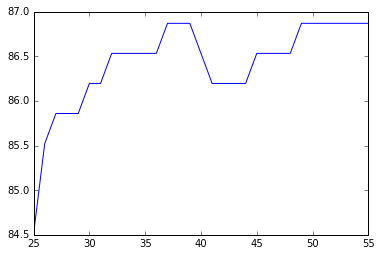

In [165]:
#choose a suitable learning rate
alpha = 0.01
#define the number of iterations the algorithm starts with
min_iterations = 25
#define the number of times that the iterations get increased by 1
max_incr_iterat = 30
#define theta as a matrix filled with zeros
theta = np.zeros((64,10))

#initialize dtheta
dtheta = 0

#It is important to check that you're not overfitting by testing your prediction on a testset
#turns 3-dim. into a 2-dim. 1500 x array (every row one image)
x = np.reshape(digits.images[:1500],(1500,64))
#testset (1500 to the end); 297 = total number of images - 1500
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

#function calculating gradient descent
def learn(x, target, theta, iterations):
    for i in range(iterations):
        for j in range(x.shape[0]):
            #define x_predict as the prediction function h
            x_predict = prediction_function(x[j,:],theta)
            #create a y vector filled with zeros
            y = np.zeros(10)
            #set the right class equal to 1
            y[target[j]] = 1
            #define dtheta as the partial derivative of the cost function
            dtheta = compute_gradient(x_predict,y,x[j,:])
            #update theta after every iteration 
            theta = np.add(theta, np.multiply(-alpha, dtheta.T))    
    return theta
                                      
#function counting how many correct tests there are
def counting(x, target, theta):
    #initialize the number of correct tests
    count = 0
    for i in range(x.shape[0]): 
        x_predict = prediction_function(x[i,:],theta)
        #check if the maximum x_predict is the target, if yes, increase count by 1
        if x_predict.argmax() == target[i]:
            count += 1
    return count

#make list to save percentages in
save = np.zeros(max_incr_iterat + 1) #to go through loop 'max_incr_iterat' times
#print header of table
print "Iterations  Correct tests  Correct percentage"

#start with the previoulsy defined minimum number of iterations
iterations = min_iterations
for i in range(save.shape[0]):
    #calculate gradient descent
    theta = learn(x, target, theta, iterations)
    #find the bumber of correct tests
    count = counting(x_test, target_test, theta)
    #calculate the percentage of correct tests
    p = 100 * float(count) / x_test.shape[0]
    #save calculated percentage by adding it to the 'save' list
    save[i] = p
    #print the calculated values for each iteration in each row of the table
    print iterations, "        ", count, "          ", ("%.2f" % p) #print 2 decimal places for the percentage
    #go to next iteration
    iterations += 1

#look for the maximum percentage and what number of iterations was used for it 
max_p = save.argmax()
print "Conclusion: The maximum percentage of",("%.2f" % save[max_p]) , "is acquired with", (max_p+min_iterations), "iterations.\n"

#plot number of iterations on x-axis and percentages on y-axis 
list_iterations = []
for i in range(min_iterations, min_iterations + max_incr_iterat + 1):
    list_iterations.append(i)
print "Plot of number of iterations on x-axis and percentages on y-axis:"
plt.plot(list_iterations, save)

#NOTE: going up to higher iterations makes the program to heavy to be successfully uploaded onto GitHub.